Вот пример программы на **Python**, которая использует полносвязную нейронную сеть для распознавания рукописных цифр. Он включает в себя регуляризацию **Dropout** для обучения сети. Программа выводит предсказанные результаты на экран, вычисляет процент правильности и строит график правильности с помощью **Matplotlib**.

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.2478 - accuracy: 0.9271 - val_loss: 0.1137 - val_accuracy: 0.9634
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9684 - val_loss: 0.0811 - val_accuracy: 0.9740
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0730 - accuracy: 0.9765 - val_loss: 0.0728 - val_accuracy: 0.9765
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0549 - accuracy: 0.9818 - val_loss: 0.0666 - val_accuracy: 0.9815
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0687 - val_accuracy: 0.9794
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9864 - val_loss: 0.0713 - val_accuracy: 0.9773
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0567 - val_accuracy: 0.9840
Epoch 

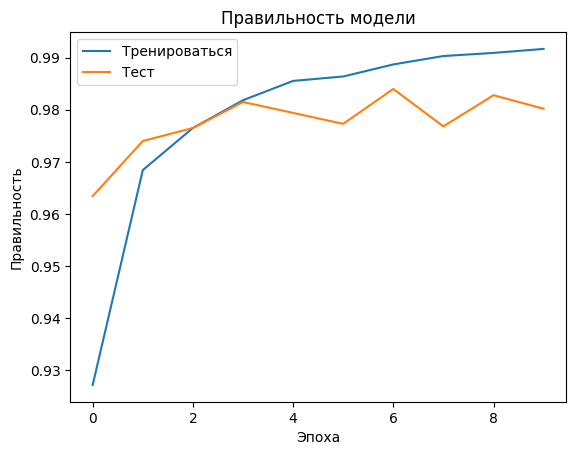

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Загрузите набор данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Предварительно обработайте данные
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Создайте полносвязную нейронную сеть
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Скомпилируйте модель
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Обучите модель
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Оценить модель
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Точность теста:', test_acc)

# Прогнозировать на тестовых данных
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Рассчитать процент правильности
correctness_percentage = np.mean(predicted_labels == np.argmax(y_test, axis=1)) * 100
print('Процент правильности:', correctness_percentage)

# Постройте график правильности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Правильность модели')
plt.xlabel('Эпоха')
plt.ylabel('Правильность')
plt.legend(['Тренироваться', 'Тест'], loc='upper left')
plt.show()


In [9]:
# Выберите конкретный тестовый образец
sample_index = 7  # Измените этот индекс, чтобы выбрать другой образец

# Предсказать выбранную выборку
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction[0])

# Вывести результат предсказания
print("Фактическая этикетка:", np.argmax(sample_label))
print("Прогнозируемая метка:", predicted_label)


1/1 [==============================] - 0s 21ms/step
Фактическая этикетка: 9
Прогнозируемая метка: 9


**Примечание:** Эта программа предполагает, что у вас установлены **TensorFlow** и **Matplotlib**. При необходимости вы можете установить их с помощью **pip: pip install tensorflow matplotlib**.

Эта программа использует набор данных **MNIST**, широко используемый набор данных для распознавания рукописных цифр. Он предварительно обрабатывает данные, изменяя форму и нормализуя значения пикселей. Полносвязная нейронная сеть состоит из двух скрытых слоев с активацией **ReLU** и регуляризацией отсева для предотвращения переобучения. Сеть обучается с использованием оптимизатора **Адама** и **категориальной кросс-энтропийной** потери. Затем программа оценивает точность тестовых данных и строит график, показывающий правильность (**точность**) модели в течение эпох обучения.

Вы можете дополнительно настроить программу, изменив архитектуру сети, параметры обучения или попробовав разные наборы данных.